In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
path=r"C:\Users\84280\Desktop\lianxi\logistic_ex2data1.txt"
data=pd.read_csv(path,header=None,names=['exam1','exam2','admitted'])

In [3]:
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


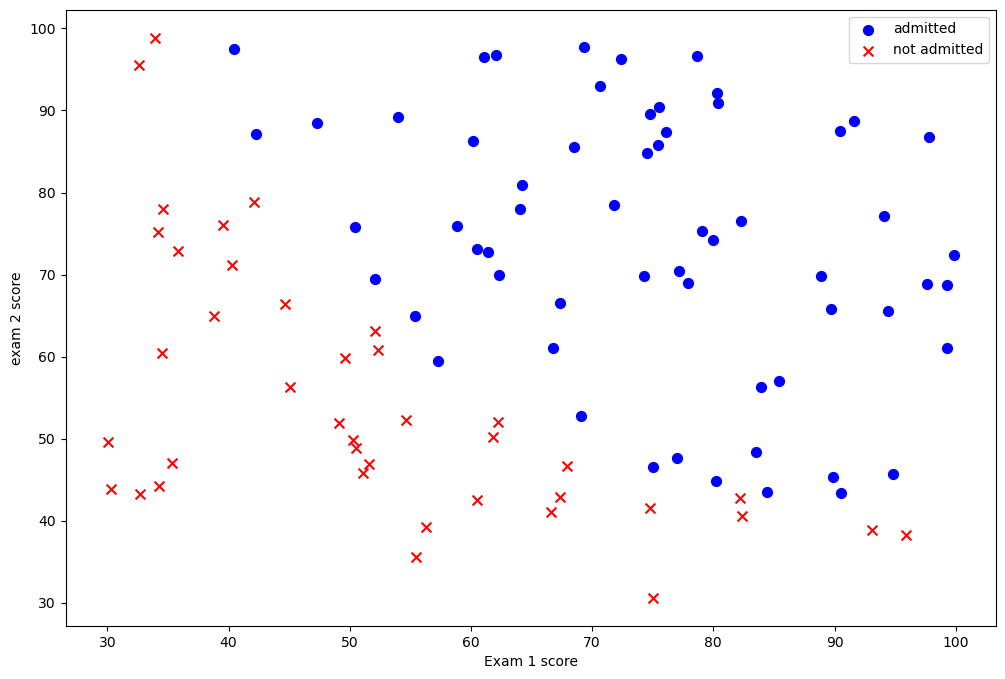

In [4]:
positive=data[data['admitted'].isin([1])] # 先将测试数据集分类 只需要对01变量分类即可
negative=data[data['admitted'].isin([0])] 
# 绘图的时候
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['exam1'],positive['exam2'],s=50,c='b',marker='o',label='admitted')
ax.scatter(negative['exam1'],negative['exam2'],s=50,c='r',marker='x',label='not admitted')
ax.legend()#确定图例的位置
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('exam 2 score')
plt.show()
           

In [5]:
# 写sigmoid 函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

<function matplotlib.pyplot.show(close=None, block=None)>

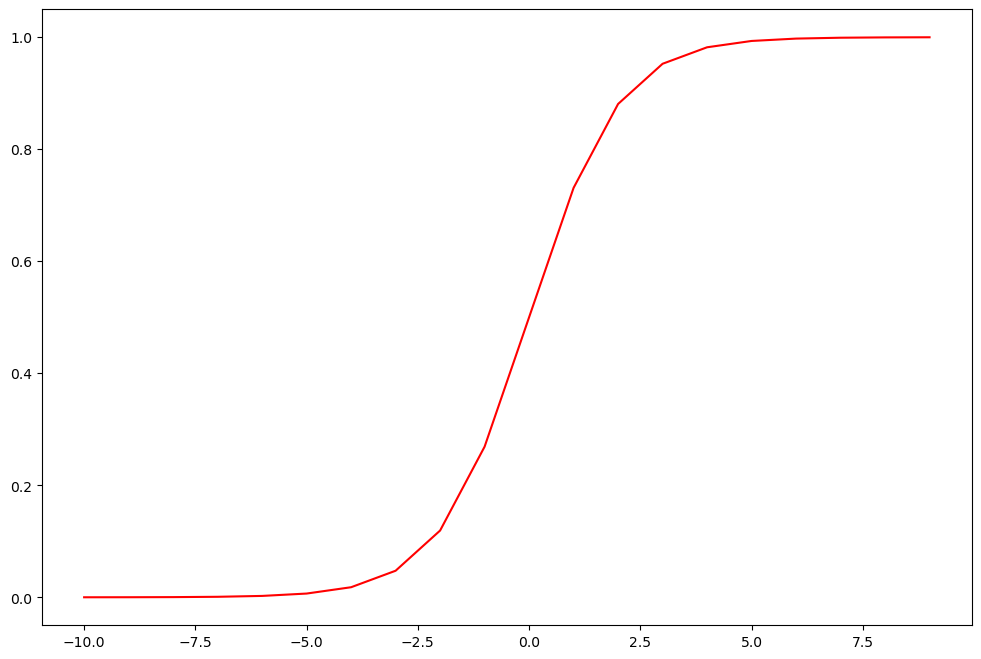

In [6]:
nums=np.arange(-10,10)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(nums,sigmoid(nums),'r')
plt.show

In [7]:
# 写损失函数  
def cost(theta,X,y):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    h=sigmoid(X@theta.T) ## 原函数
    first=np.multiply(-y,np.log(h))
    second=np.multiply(1-y,np.log(1-h))
    return np.sum(first-second)/(len(X))


In [8]:
data.insert(0,'ones',1)
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]
X=np.array(X)
y=np.array(y)
theta=np.zeros(3)



In [9]:
np.matrix(theta).ravel().shape[1]

3

In [10]:
cost(theta,X,y)

0.6931471805599453

In [11]:
#梯度下降
def gradient(theta,X,y):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    error=sigmoid(X@theta.T)-y
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    return grad
        

In [12]:
gradient(theta,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

In [13]:
# 可以利用SciPy 的


In [14]:
import scipy.optimize as opt

In [15]:
result=opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [16]:
cost(result[0],X,y)

0.20349770158947458

In [17]:
def predict(theta,X):
    probability=sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for x in probability]# 分配函数，只是用来分配预测后的y 什么时候取1，什么时候取0
theta_min=np.matrix(result[0])
predictions=predict(theta_min,X)
correct=[1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)]
accuracy=(sum(map(int,correct))% len(correct))
print('accuracy={0}%'.format(accuracy))

accuracy=89%


In [18]:
# 正则化逻辑回归

In [19]:
path=r'C:\Users\84280\Desktop\lianxi\logistic_ex2data2.txt'

In [20]:
data2=pd.read_csv(path,header=None, names=['test1','test2','accepted'])
data2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [21]:
positive=data2[data2['accepted'].isin([1])]
negtive=data2[data2['accepted'].isin([0])]

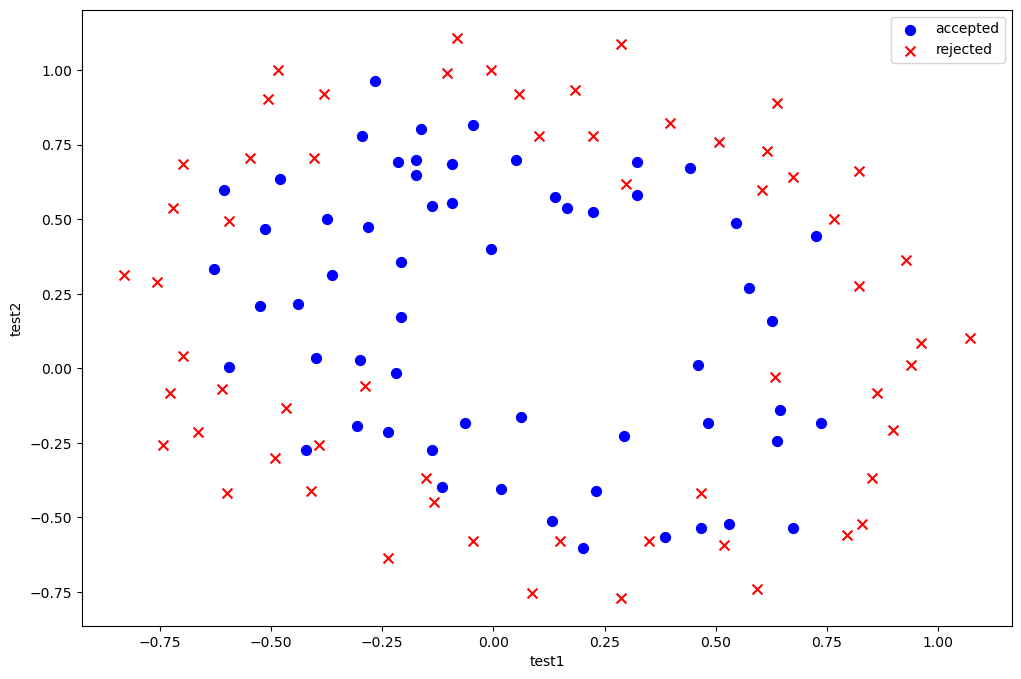

In [22]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['test1'],positive['test2'],s=50,c='b',marker='o',label='accepted')
ax.scatter(negtive['test1'],negtive['test2'],s=50,c='r',marker='x',label='rejected')
ax.legend()
ax.set_xlabel('test1')
ax.set_ylabel('test2')
plt.show()

In [23]:
#图中的分类并不遵循线性的规律需要对原来的数据生成高次项
degree=5
x1=data2['test1']
x2=data2['test2']
data2.insert(3,'ones',1)

for i in range(0,degree):
    for j in range(0,i):
        data2['F'+str(i)+str(j)]=np.power(x1,i-j)*np.power(x2,j)
data2.drop('test1',axis=1,inplace=True)
data2.drop('test2',axis=1,inplace=True)
data2.head()

,accepted,ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [40]:
#正则化损失函数
def costReg(theta,X,y,learningRate):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    first=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    reg=(learningRate/(2*len(X)))*np.sum(np.power(theta[:,1:theta.shape[1]],2))# 正则项
    return np.sum(first-second)/len(X)+reg


In [47]:
#梯度下降算法，这个函数实际上只执行了梯度的求解，没有执行下降
def gradientReg(theta,X,y,learningRate):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    error=sigmoid(X*theta.T)-y
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        if (i==0):
            grad[i]=np.sum(term)/len(X)
        else:
            grad[i]=(np.sum(term)/len(X))+(learningRate/len(X))*theta[:,i]
    return grad

In [48]:
# 初始化变量
cols=data2.shape[1]
X2=data2.iloc[:,1:cols]
y2=data2.iloc[:,0:1]
X2=np.array(X2)
y2=np.array(y2)
theta2=np.zeros(11)

In [49]:
learningRate=1
costReg(theta2,X2,y2,learningRate)

0.6931471805599454

In [51]:
gradientReg(theta2,X2,y2,learningRate)


array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [55]:
#使用优化包来scipy.optimize 来实现最优化
result2=opt.fmin_tnc(func=costReg,x0=theta2,fprime=gradientReg,args=(X2,y2,learningRate))

In [56]:
result2

(array([ 0.53010249,  0.29075567, -1.60725763, -0.5821382 ,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264303, -0.9503358 ,
         0.0344085 ]),
 22,
 1)

In [76]:
theta_min=np.matrix(result2[0])
prediction=predict(theta_min,X2)
correct=[1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(prediction,y2)]

print('accuracy={0}%'.format(accuracy))


accuracy=0.6610169491525424%


In [81]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2,y2.ravel())

LogisticRegression()

In [83]:
model.score(X2,y2)

0.6610169491525424